In [1]:
#install
# !pip install -qU git+https://github.com/harvardnlp/pytorch-struct
# !pip install -qU git+https://github.com/harvardnlp/genbmm
# !pip install -q matplotlib

import time
import torch
import torch_struct
import matplotlib.pyplot as plt


In [2]:
ref_string = "Address:-Boston-MA-12345."
new_string= "Address:-Biltam-MA-12345."
#ref_string = "State ofNew Jersey, Schedule, NJK-1, 2019, Partnerâ€™sShare, of Income, (Form, NJ-1065), , For Calendar Year 2019, or Fiscal Year Beginning, , 2019 and ending, , 20, Part I, General Information, Partner's SS # or Federal EIN, Partnership's Federal EIN, 46-0923191, 20-2998535, Lexington gemstone holdings (A), L.P., Partner's Name, Partnership's Name, OCM OPPORTUNITIES FUND VI, L.P., 660 madison avenue, Street Address, Partnership's Street Address 333 south GRAND AVENUE 28TH FLOOR, 23RD, FLOOR, City, State, ZIP Code, City, State, ZIP Code, LOS ANGELES,, CA, 90071, NEW YORK,, NY, 10065, Enter Partner's percentage of:, What type of entity is partner?, (see instructions), (i ), Before Decrease, (ii) End of Year, Code, or Termination, 41274, 0.00282432, 0.00282472, Date Partner's Interest in Partnership began:, Profit Sharing, Month, Day, Year, 0.00282472, 0.00282432, , Loss Sharing, Final NJK-1, Hedge Fund, Amended NJK-1, 0.00224657, 0.00224314, Member of Composite Return, Capital Ownership, Part II, Income Information, i. New Jersey Source, Income Classification, A. Total Distribution, NJ-1040NR Filers, Amounts, 1, Partnership Income (loss), 13998, , 2, Net Guaranteed Payments, , 3, Partner's 401(k) Contribution, 4, Distributive Share of Partnership, Income (loss) (Line 1 plus line, Line 21, Line 23, 13998, minus line 3), 5, Pension, Line 20a, 6, Net Gain (loss) From Disposition, Line19, of Assets as a Result of, Line 19, Complete Liquidation, Part III, Partnerâ€™s Information, Line 10b, Page 1, CBT-100, Line 8a, Page 1, CBT-100S, Line 11, Page 1, CBT-100U, Line 7, NJ-CBT-1065, Line 50, NJ-1040NR, Line 23, NJ-1080C, 1, Nonresident Partner's Share of NJ Tax, 1, Line 34a, NJ-1041, 2, Partner's HEZ Deduction, 2, 3, Partner's Sheltered Workshop Tax Credit, 3, Part IV, Supplemental Information (Attach Schedule), THIS FORM MAY BE REPRODUCED"
#new_string = "########SCHEDULE, STATE OF NEW JERSEY, NJK-1, (Form NJ-1065), PARTNER'S, SHARE, OF, INCOME, 2018, For Calendar Year 2018, or Fiscal Year Beginning, , 2018 and ending, , 20, General Information, PART I, Partnershipâ€™s Federal EIN, Partnerâ€™s SS # or Federal EIN, Foreign, 82-4005992, Partnershipâ€™s Name, Partnerâ€™s Name, Frazier Healthcare Growth Buyout Fund IX, L.P., HarbourVest Partners X AIF Buyout L.P., Partnershipâ€™s Street Address, Street Address, 20 rue des Peupliers, 601 UNION STREET SUITE 3200, City, State, Zip Code, City, State, Zip Code, WA, Luxembourg,, L-2328, SEATTLE,, 98101, LU, Enter Partnerâ€™s percentage of:, FC, (see instructions), What type of entity is partner?, End of Year, (i) Before Decrease, (ii), Code, or Termination, 0, 0.02100527, Date Partnerâ€™s Interest in Partnership began:, Profit Sharing, Month, Day, Year, 0.000000o%, 0.02100527, Loss Sharing, Final NJK-1, Hedge Fund, Amended NJK-1, Member of Composite Return, 0.000000o%, 2.169514o/o, Capital Ownership, Income, PART II, Information, NJ-1040 Filers, B., New Jersey Source, Enter Amounts on, Total Distribution, Income Classifications, A., NJ-1040NR Filers, Amounts, Line Shown Below, 1. Partnership Income (loss), -3704, 2. Net Guaranteed Payments, , 3. Partner's 401(k) Contribution, 4. Distributive Share of Partnership, Line 21, Line 23, Income (loss), (Line 1 plus Line 2 minus Line 3), -3704, Line 20a, 5. Pension, 6. Net Gain (loss) From Disposition, of Assets as a Result of a, Line 19, Line 19, Complete Liquidation, PART III, Partner's Information, Line 19a, Page 1 CBT-100, Line 10a, Page 1 CBT-100S, Line 7, NJ-CBT-1065, 1, 1. Nonresident Partner's Share of NJ Tax, Line 50, NJ-1040NR, Line 23, NJ-1080C, Line 34a, NJ-1041, 2, 2. Partner's HEZ Deduction, 3, 3. Partner's Sheltered Workshop Tax Credit, PART IV, Supplemental Information, (Attach Schedule), THIS FORM MAY BE REPRODUCED"
# ref_string = ref_string[0:50]
# new_string = new_string[0:50]
# ref_string = "State ofNew Jersey, Schedule, NJK-1, 2019, Partnerâ€™sShare, of Income, (Form, NJ-1065), , For Calendar Year 2019, or Fiscal Year Beginning"
# new_string = "STATE OF NEW JERSEY, NJK-1, (Form NJ-1065), PARTNER'S, SHARE, OF, INCOME, 2018, For Calendar Year 2018, or Fiscal Year Beginning"



In [3]:

t_start = time.time()

In [4]:

ref_string_list_ = [(list(word)) for word in ref_string]
ref_string_list = ["".join(s) for s in ref_string_list_]

new_string_list_ = [(list(word)) for word in new_string]
new_string_list = ["".join(s) for s in new_string_list_]
vocab = list(set(new_string_list+ref_string_list))
len(ref_string), len(new_string)

(25, 25)

In [5]:
# Character Vocab, P is a padding token
#vocab = ["1","2","3","4","5","6","7","8","9","a", "b", "c", "d", "e", "_", "P","PAD","W","s","h","g","o","n","t","v","r","L","i","D","C"]
v_dict = { a:i for i, a in enumerate(vocab)}
L = len(vocab)

# # Char sequence
letters = [new_string_list,new_string_list]
#new seq len
t = len(letters[0])

# Padding


frames = [ref_string_list,ref_string_list]
# Constants
T, B = len(frames[0]), len(frames)
D1, MATCH, D2 = 0, 1, 2

batch_lengths = [(t, T), (t, T)]
#batch_lengths = [(t, T)]
T,B

(25, 2)

In [6]:
def show(m, ex):
    plt.figure(figsize = (20,20))
    plt.style.use('seaborn-dark-palette')
    #plt.style.context('dark_background')
    plt.tick_params(labelsize=10)
    plt.yticks(torch.arange(len(letters[ex])), letters[ex])
    plt.xticks(torch.arange(T), [str(frames[ex][x.item()]) for x in torch.arange(T)])
    plt.imshow(m[ex].cpu().detach())


In [7]:
b, i = len(frames[0]),len(frames[1])


In [9]:
# Gold alignment. 
gold = torch.zeros(B, t).long()
for b in range(B):
    for i, l in enumerate(letters[0]):
        gold[b, i] = v_dict[l]
gold = gold[:, None, :].expand(B, T, t)

# Inputs (boost true frames a bit)
logits = torch.zeros(B, T, L)
for b in range(B):
    for i in range(T):
        
        logits[b, i, v_dict[frames[b][i]]] += 1
        

# Construct the alignment problem from CTC

# Log-Potentials
log_potentials = torch.zeros(B, T, t, 3).fill_(-1e5)

# Match gold to logits. 
match = torch.gather(logits, 2, gold)

# CTC Rules:
for b, (lb, la)  in zip(range(B), batch_lengths):
    # la and lb are the sizes of the two (without padding)

    # Never allowed to fully skip regular characters (little t)
    log_potentials[b, :la, :lb:2,  D2] = -1e5

    # Free to skip _ characters (little t)
    log_potentials[b, :la, 1:lb:2, D2] = 0

    # First match with character is the logit. 
    log_potentials[b, :la, :lb, MATCH] = match[b, :la, :lb]

    # Additional match with character is the logit.
    log_potentials[b, :la, :lb, D1] = match[b, :la, :lb]

    # Match padding in an L shape
    log_potentials[b, la:, lb-1, D1] = 0
    log_potentials[b, -1, lb:, D2] = 0




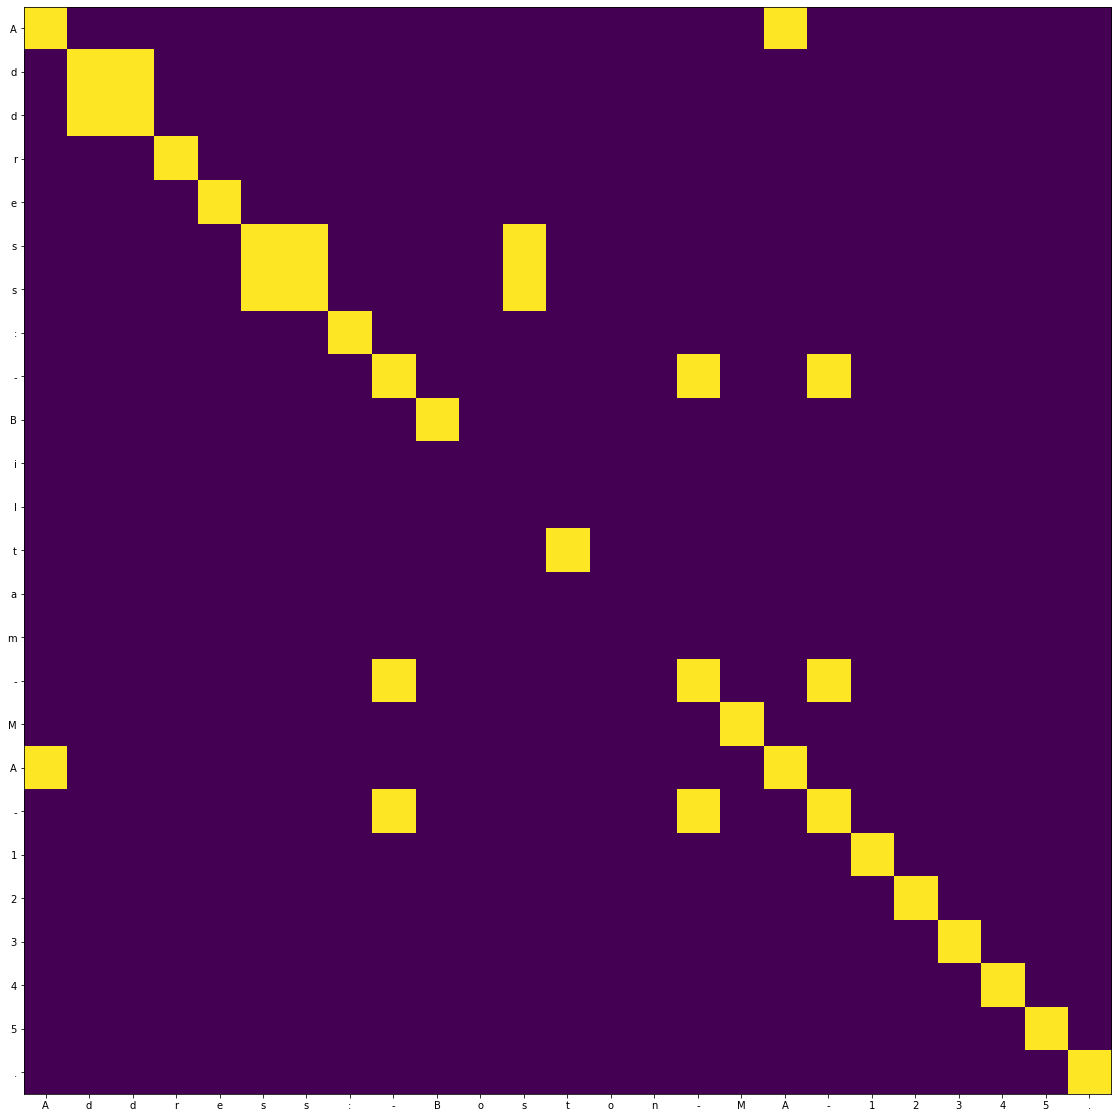

In [11]:
#log_potentials = log_potentials.transpose(1, 2).cuda()
log_potentials = log_potentials.transpose(1, 2)

#input scores
show(match.transpose(1,2).exp(), 1)


In [12]:

dist = torch_struct.AlignmentCRF(log_potentials,local=True)


/Users/jonathandegange/opt/anaconda3/lib/python3.7/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.AlignmentCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


In [13]:
  # Find marginals (see uncertainty from randomness)
show(dist.marginals, 1)

AttributeError: type object 'LogSemiring' has no attribute 'one_'

In [14]:
t_end = time.time()

In [15]:
print(t_start,t_end (t_start-t_end))

TypeError: 'float' object is not callable

In [16]:
# K max
dist.kmax(3)

AttributeError: type object 'KMaxSemiring' has no attribute 'one_'

In [17]:
# Top K
dist.topk(3)

AttributeError: type object 'KMaxSemiring' has no attribute 'one_'

In [18]:
#marginals
dist.marginals.shape

AttributeError: type object 'LogSemiring' has no attribute 'one_'

In [19]:
#count
dist.count

AttributeError: type object 'StdSemiring' has no attribute 'one_'

In [20]:
#partition
dist.partition

AttributeError: type object 'LogSemiring' has no attribute 'one_'

In [21]:

# Find marginals (see uncertainty from randomness)
show(dist.marginals, 1)

AttributeError: type object 'LogSemiring' has no attribute 'one_'

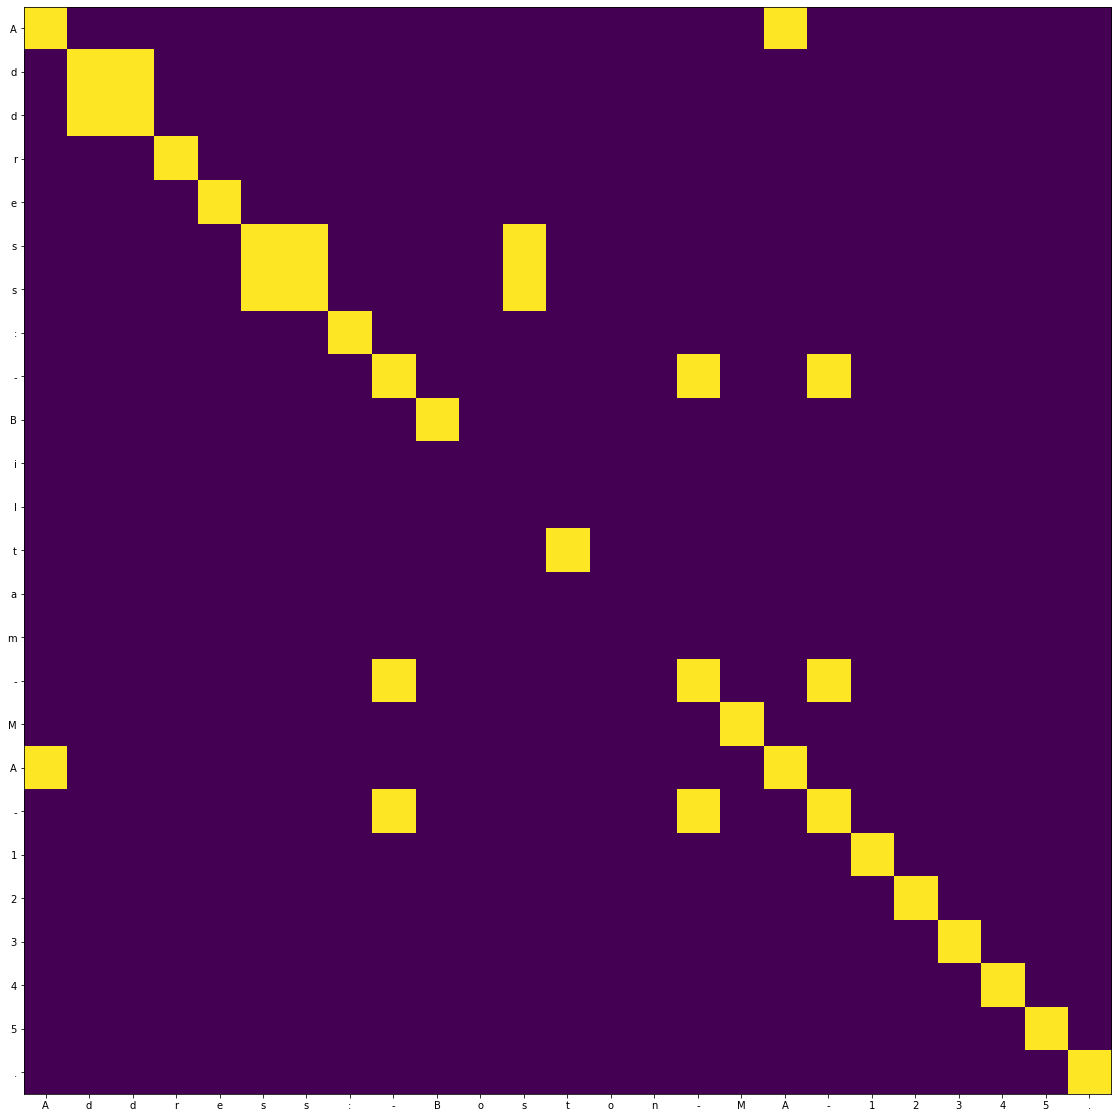

In [22]:
show(log_potentials[:, :, :, 1].exp(), 1)

In [23]:

dist.argmax

AttributeError: type object 'MaxSemiring' has no attribute 'one_'

In [24]:
dist.max

AttributeError: type object 'MaxSemiring' has no attribute 'one_'